In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               19999 non-null  int64 
 1   Clothing ID              19999 non-null  int64 
 2   Age                      19999 non-null  int64 
 3   Title                    16751 non-null  object
 4   Review Text              19288 non-null  object
 5   Rating                   19999 non-null  int64 
 6   Recommended IND          19999 non-null  int64 
 7   Positive Feedback Count  19999 non-null  int64 
 8   Division Name            19990 non-null  object
 9   Department Name          19990 non-null  object
 10  Class Name               19990 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.7+ MB


In [5]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3248
Review Text                 711
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 9
Department Name               9
Class Name                    9
dtype: int64

In [6]:
review_data = data.drop(columns = ['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis = 1)

In [7]:
review_data.head()

,Review Text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...


In [8]:
review_data = review_data.dropna()

In [9]:
review_data = review_data.rename({'Review Text': 'review'}, axis = 1)

In [10]:
review_data.head()

,review
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...


In [11]:
review_data.isnull().sum()

review    0
dtype: int64

#### Data Preprocessing

In [12]:
ps = PorterStemmer()

In [13]:
def preprocessing(x):
    x = re.sub('[^a-zA-z ]', "", x)  # Keep only alphabets
    x = x.lower()    # convert everything into lower case
    x = x.split()    # split the words
    x = [word for word in x if word not in set(stopwords.words('english'))]    # removing the stop words
    x = [ps.stem(word) for word in x]    # porter stemmer
    x = " ".join(x)    # joining
    return x

In [14]:
review_data['review'] = review_data['review'].apply(preprocessing)# If you're running this it will take time.

#### Getting polarity score

In [15]:
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity

In [16]:
review_data['polarity'] = review_data['review'].apply(getPolarity)

In [17]:
review_data.head()

,review,polarity
0,absolut wonder silki sexi comfort,0.000000
1,love dress sooo pretti happen find store im gl...,0.462500
2,high hope dress realli want work initi order p...,0.069412
3,love love love jumpsuit fun flirti fabul everi...,0.520000
4,shirt flatter due adjust front tie perfect len...,0.458333


#### Mapping polarity score to reaction
##### - Negative reaction (0)
##### - Positive reaction (1)

In [18]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  else:
    return 'Positive'

In [19]:
review_data['reaction'] = review_data['polarity'].apply(getAnalysis)

In [20]:
review_data['reaction'].value_counts()

Positive    17972
Negative     1316
Name: reaction, dtype: int64

In [21]:
review_data.reaction = review_data.reaction.map({'Negative':0,'Positive':1})

<AxesSubplot:xlabel='reaction', ylabel='Density'>

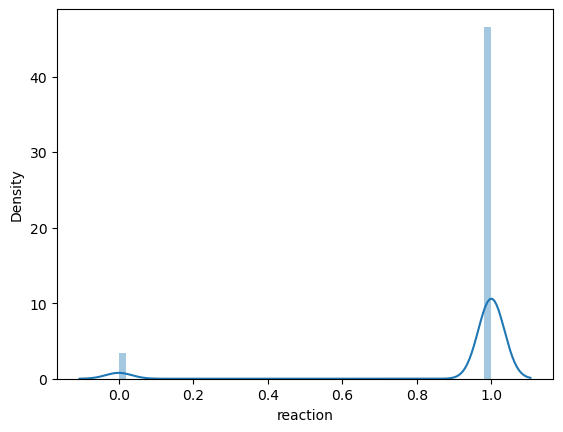

In [24]:
sns.distplot(review_data.reaction)

#### Count vectorizing

In [25]:
cv = TfidfVectorizer()

In [26]:
x = cv.fit_transform(review_data.review.values).toarray()
x = pd.DataFrame(x, columns = cv.get_feature_names())

In [27]:
x

,aa,aaaaaaamaz,aaaaandidontwanttopayforship,aaaaannnnnnd,aaaahmaz,aaah,aam,ab,abbey,abbi,...,ziploc,zippedfor,zipper,zipperi,zipperon,zippi,zombi,zone,zooland,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.13206,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Train-Test split data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, review_data.reaction, test_size = 0.2, random_state = 2)

#### Model fitting(Trying decision Tree and logisitic regression)

In [29]:
models=[DecisionTreeClassifier(random_state=10),LogisticRegression()]
for model in models:
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(model,"accuracy ::",metrics.accuracy_score(y_test,pred))

DecisionTreeClassifier(random_state=10) accuracy :: 0.9279419388284085
LogisticRegression() accuracy :: 0.9396060134784863


In [30]:
reaction =' '.join(review_data.review)
reaction[: 1000]

'absolut wonder silki sexi comfort love dress sooo pretti happen find store im glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c love love love jumpsuit fun flirti fabul everi time wear get noth great compliment shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt love traci rees dress one petit feet tall usual wear p brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten narrow skirt would take away embellish garment love color idea style work return dress ade basket hte last mintu see would look like person store pick went teh darkler color pale hte colo

#### Word cloud

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [32]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

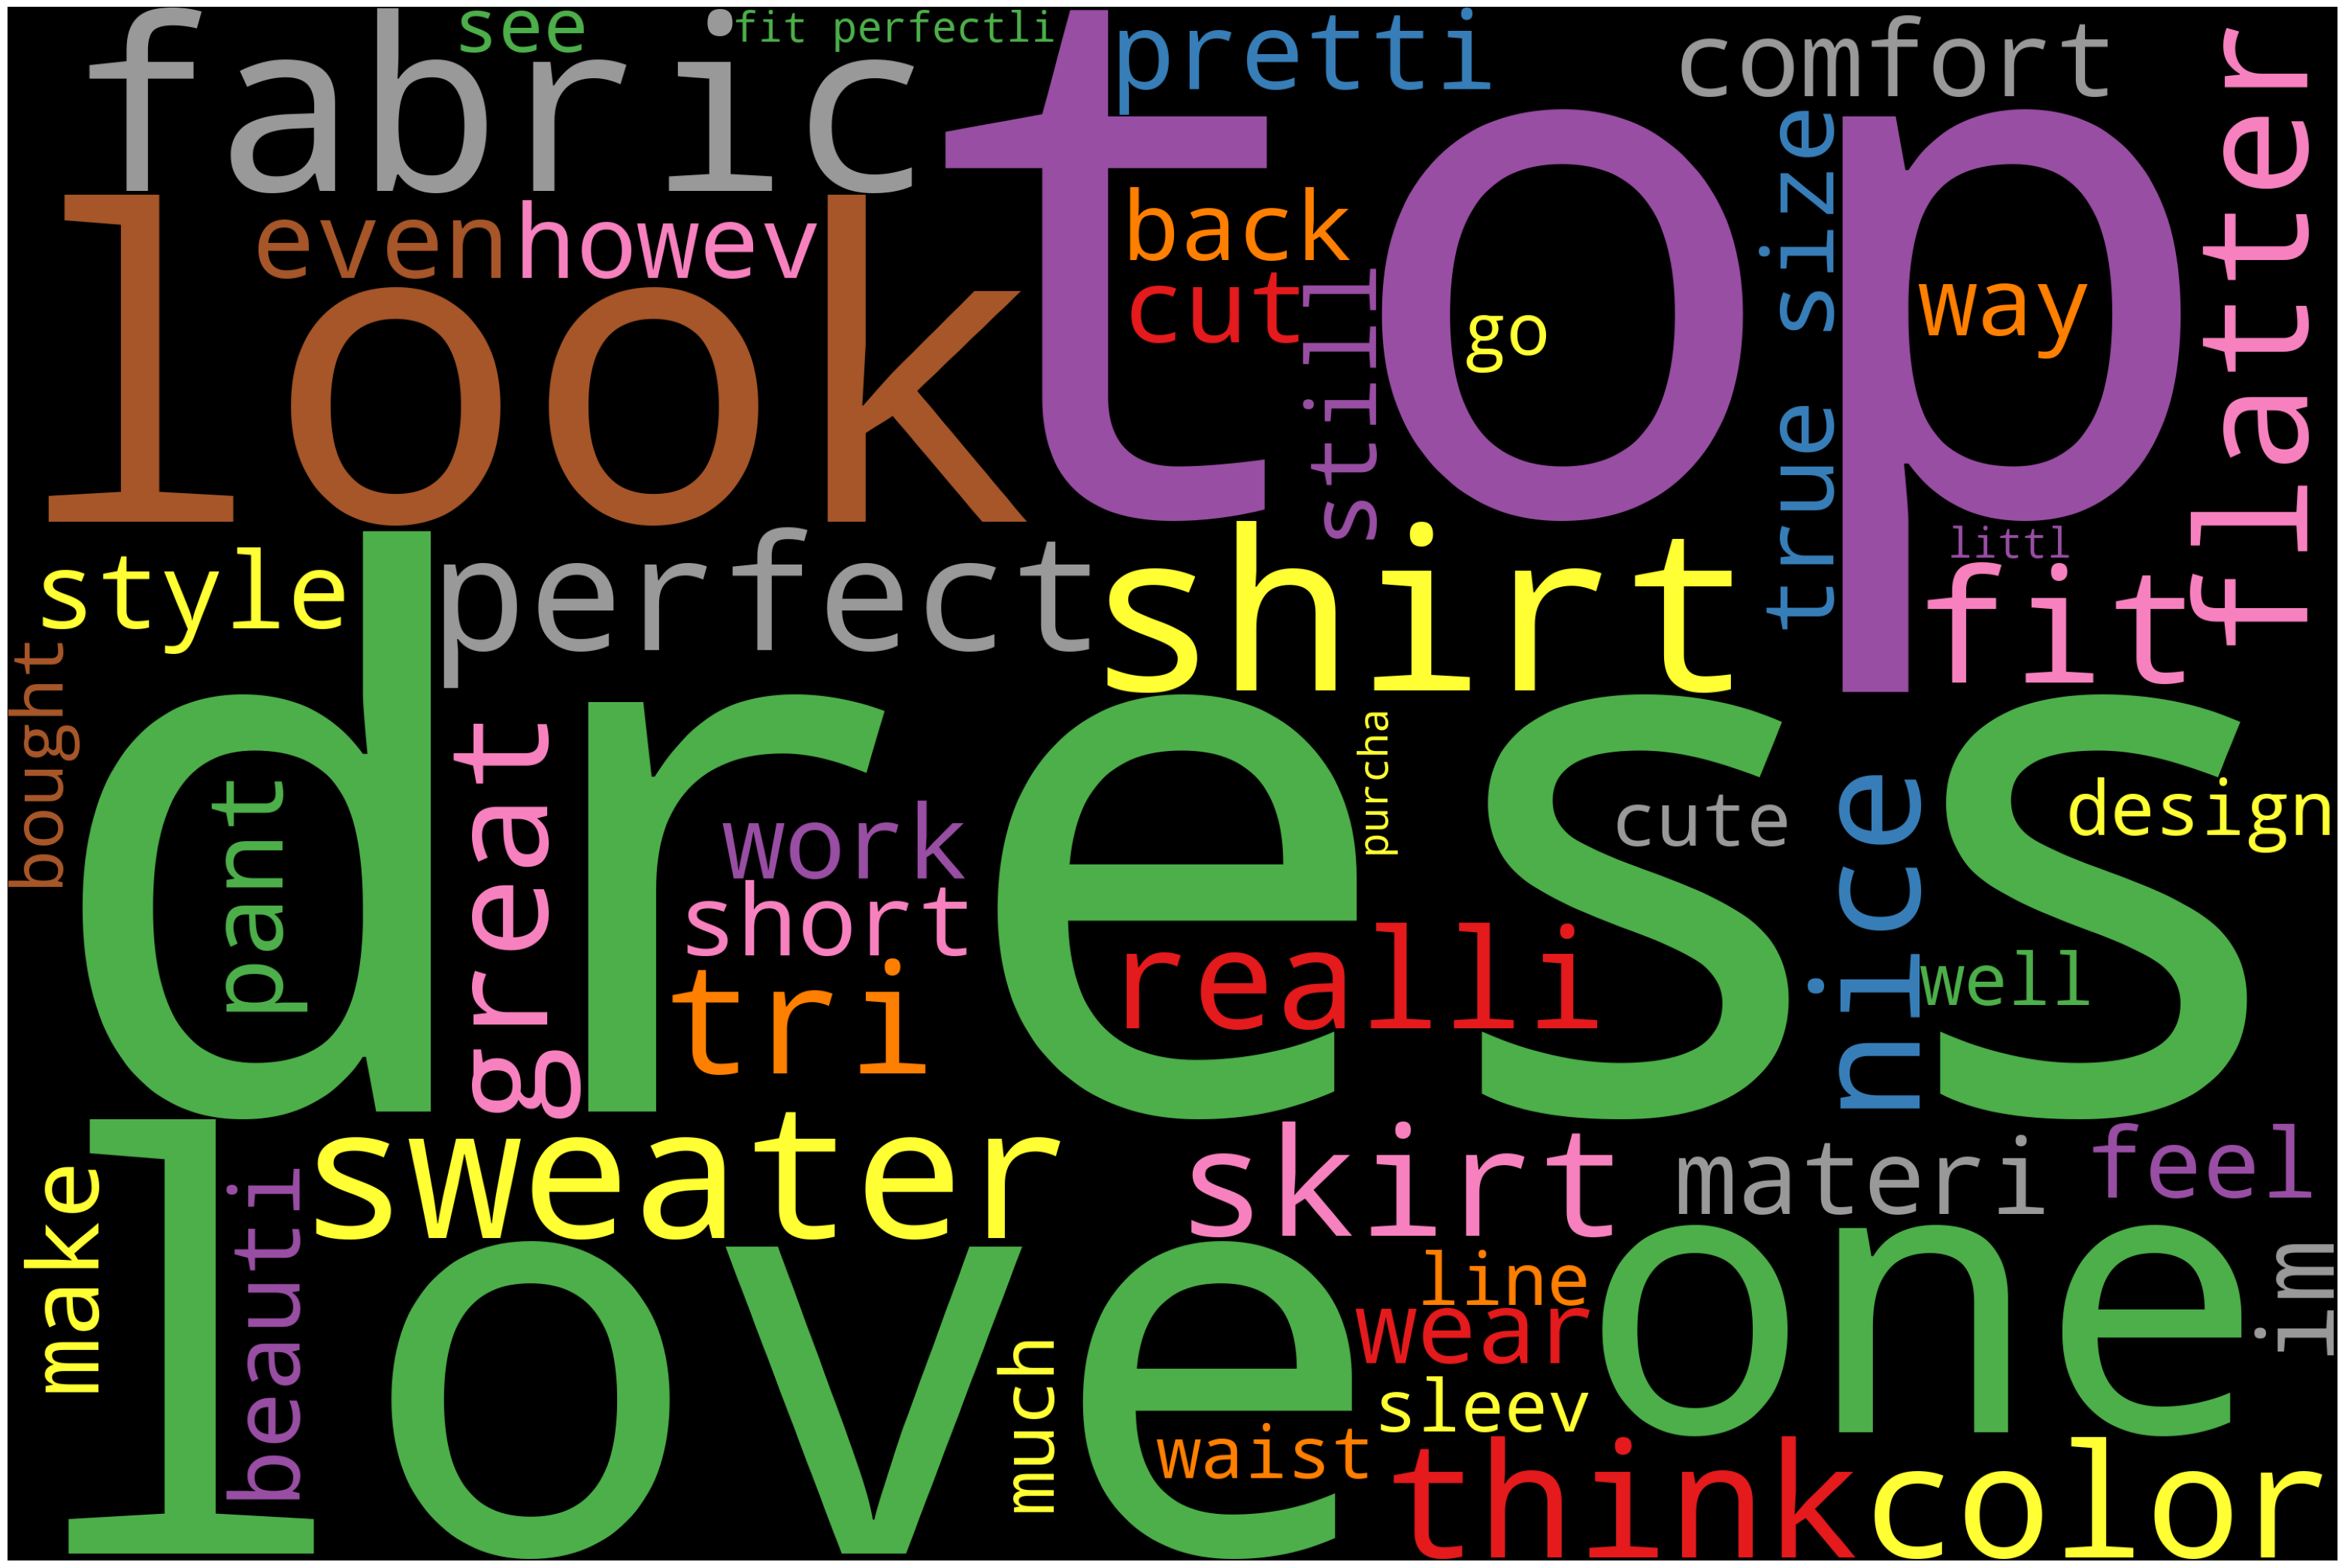

In [33]:
wordcloud=WordCloud(width = 3000, height = 2000, background_color = 'black', max_words = 50,
                   colormap = 'Set1').generate(reaction)
plot_cloud(wordcloud)